In [1]:
import polars as pl

In [4]:
df = pl.read_parquet("bgg/data/raw_bgg_data_20250206.parquet")

In [2]:
a = df.unique(subset="language_dependence_description")

NameError: name 'df' is not defined

In [7]:
a

game_name,description,subcategory_1,subcategory_2,publication_year,min_players,max_players,best_num_players,recommended_num_players,suggested_play_age,categories,mechanics,families,designers,artists,publishers,playing_time,min_playtime,max_playtime,min_age,language_dependence_description,game_rank,avg_rating,num_rates,rank_subcategory_1,rank_subcategory_2,avg_weight,num_weights,owned_by,wished_by
str,str,str,str,i32,i32,i32,i32,i32,i32,list[str],list[str],list[str],list[str],list[str],list[str],i32,i32,i32,i32,str,i32,f64,i32,i32,i32,f64,i32,i32,i32
"""Dragonmaster""","""Dragonmaster is a trick-taking…","""strategygames""",null,1981,3,4,4,3,null,"[""Card Game"", ""Fantasy""]","[""Trick-taking""]","[""Components: Gems/Crystals"", ""Creatures: Dragons"", ""Theme: Art style – Art Nouveau""]","[""G. W. ""Jerry"" D'Arcey""]","[""Bob Pepper""]","[""E. S. Lowe Company Inc."", ""Milton Bradley""]",30,30,30,12,"""Some necessary text - easily m…",5179,6.65748,602,2002,null,1.9643,56,1417,217
"""Cosmic Encounter""","""By request of Fantasy Flight G…","""thematic""","""strategygames""",1977,2,6,4,6,12,"[""Bluffing"", ""Negotiation"", ""Science Fiction""]","[""Alliances"", ""Hand Management"", … ""Variable Player Powers""]","[""Admin: Better Description Needed!"", ""Creatures: Aliens / Extraterrestrials"", … ""Misc: Dice Tower Hall of Fame""]","[""Bill Eberle"", ""Jack Kittredge"", … ""Peter Olotka""]","[""John Blanche"", ""Chris Ferguson"", … ""Lori Walls""]","[""Eon"", ""Alga"", … ""West End Games""]",90,90,90,12,"""Moderate in-game text - needs …",1539,6.92645,3979,369,916,2.3721,430,4508,487
"""Die Macher""","""Die Macher is a game about sev…","""strategygames""",null,1986,3,5,5,4,14,"[""Economic"", ""Negotiation"", ""Political""]","[""Alliances"", ""Area Majority / Influence"", … ""Simultaneous Action Selection""]","[""Country: Germany"", ""Digital Implementations: VASSAL"", … ""Series: Classic Line (Valley Games)""]","[""Karl-Heinz Schmiel""]","[""Bernd Brunnhofer"", ""Marcus Gschwendtner"", ""Harald Lieske""]","[""Hans im Glück"", ""Moskito Spiele"", … ""YOKA Games""]",240,240,240,14,"""No necessary in-game text""",452,7.59004,5872,262,null,4.3101,790,8287,2183
"""Dragon Masters""","""This odd little game put out b…","""wargames""",null,1991,2,4,null,null,8,"[""Fantasy"", ""Wargame""]",[],"[""Creatures: Dragons"", ""Setting: Warhammer Fantasy Board Games""]","[""Ian Livingstone""]","[""Christos Achilleos""]","[""Games Workshop Ltd.""]",120,120,120,12,null,20986,5.8,153,3858,null,2.0909,11,396,57
"""Battlemist""","""In this fantasy relative to Tw…","""wargames""","""thematic""",1998,2,6,4,3,12,"[""Exploration"", ""Fantasy"", ""Wargame""]","[""Dice Rolling"", ""Hexagon Grid""]","[""Mechanism: 4X"", ""Setting: The Realms of Terrinoth""]","[""Christian T. Petersen""]","[""Bill Heagy"", ""Christian T. Petersen""]","[""Fantasy Flight Games""]",200,200,200,12,"""Extensive use of text - massiv…",12662,5.89713,329,2896,1392,3.2,20,693,56


In [8]:
import polars as pl
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Example Polars DataFrame with board game features
data = {
    'feature1': [1, 0, 1],
    'feature2': [0, 1, 0],
    'feature3': [1, 1, 0],
    'feature4': [0, 0, 1]
}
df = pl.DataFrame(data)

# Similarity threshold
threshold = 0.7

# Initialize bins
bins = [[data]]

# Iterate over each board game
for row in df.iter_rows(named=True):
    # Convert Polars row to a list
    row_values = list(row.values())

    # Check similarity with existing bins
    similar_bin = None
    for bin in bins:
        # Calculate similarity with the centroid of the bin
        similarity = cosine_similarity([row_values], [bin['centroid']])[0][0]
        if similarity > threshold:
            similar_bin = bin
            break

    # Add to existing bin or create a new bin
    if similar_bin:
        similar_bin['members'].append(row_values)
        similar_bin['centroid'] = np.mean(similar_bin['members'], axis=0)  # Update centroid
    else:
        bins.append({'members': [row_values], 'centroid': row_values})

# Output the bins
for i, bin in enumerate(bins):
    print(f"Bin {i+1}: {len(bin['members'])} members")


Bin 1: 1 members
Bin 2: 1 members
Bin 3: 1 members


In [9]:
a = df.iter_rows(named=True)

In [36]:
import polars as pl
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import itertools

# Generate all possible combinations of the 4 features
combinations = list(itertools.product([0, 1], repeat=4))

# Create a DataFrame from the combinations
data = {
    'feature1': [comb[0] for comb in combinations],
    'feature2': [comb[1] for comb in combinations],
    'feature3': [comb[2] for comb in combinations],
    'feature4': [comb[3] for comb in combinations]
}
df = pl.DataFrame(data)

# Similarity threshold
threshold = 0.7

bins = []

for board_game in df.iter_rows(named=True):
    row_values = list(board_game.values())
    if not bins:
        bins.append({
            'centroid': row_values,
            'members': [row_values]
        })
        continue

    similar_bin = None
    similarity = -np.inf
    for bin in bins:
        current_similarity = cosine_similarity([row_values], [bin['centroid']])[0][0]
        if current_similarity > max(similarity, threshold):
            similar_bin = bin
            similarity = current_similarity

    if similar_bin:
        similar_bin['members'].append(row_values)
        similar_bin['centroid'] = np.mean(similar_bin['members'], axis=0)
    else:
        bins.append({'members': [row_values], 'centroid': row_values})

# Output the bins
for i, bin in enumerate(bins):
    print(f"Bin {i+1}: {len(bin['members'])} members")


Bin 1: 1 members
Bin 2: 3 members
Bin 3: 3 members
Bin 4: 2 members
Bin 5: 2 members
Bin 6: 3 members
Bin 7: 2 members


In [37]:
print(bins)

[{'centroid': [0, 0, 0, 0], 'members': [[0, 0, 0, 0]]}, {'members': [[0, 0, 0, 1], [0, 0, 1, 1], [0, 1, 1, 1]], 'centroid': array([0.        , 0.33333333, 0.66666667, 1.        ])}, {'members': [[0, 0, 1, 0], [0, 1, 1, 0], [1, 1, 1, 0]], 'centroid': array([0.33333333, 0.66666667, 1.        , 0.        ])}, {'members': [[0, 1, 0, 0], [0, 1, 0, 1]], 'centroid': array([0. , 1. , 0. , 0.5])}, {'members': [[1, 0, 0, 0], [1, 0, 0, 1]], 'centroid': array([1. , 0. , 0. , 0.5])}, {'members': [[1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 1, 1]], 'centroid': array([1.        , 0.33333333, 1.        , 0.66666667])}, {'members': [[1, 1, 0, 0], [1, 1, 0, 1]], 'centroid': array([1. , 1. , 0. , 0.5])}]


In [40]:
import polars as pl
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import itertools

# Generate all possible combinations of the 4 features
combinations = list(itertools.product([0, 1], repeat=4))

# Create a DataFrame from the combinations
data = {
    'feature1': [comb[0] for comb in combinations],
    'feature2': [comb[1] for comb in combinations],
    'feature3': [comb[2] for comb in combinations],
    'feature4': [comb[3] for comb in combinations]
}
df = pl.DataFrame(data)

# Similarity threshold
threshold = 0.7

# Assume feature1 and feature2 are one-hot encoded, while feature3 and feature4 are numerical integers
one_hot_features = ['feature1', 'feature2']
numerical_features = ['feature3', 'feature4']

bins = []

for board_game in df.iter_rows(named=True):
    row_values = list(board_game.values())
    if not bins:
        bins.append({
            'centroid': row_values,
            'members': [row_values]
        })
        continue

    similar_bin = None
    similarity = -np.inf
    for bin in bins:
        current_similarity = cosine_similarity([row_values], [bin['centroid']])[0][0]
        if current_similarity > max(similarity, threshold):
            similar_bin = bin
            similarity = current_similarity

    if similar_bin:
        similar_bin['members'].append(row_values)
        members_array = np.array(similar_bin['members'])
        new_centroid = np.mean(members_array, axis=0)

        # Round one-hot encoded features to integers
        for feature in one_hot_features:
            index = df.columns.index(feature)
            new_centroid[index] = np.round(new_centroid[index]).astype(int)

        similar_bin['centroid'] = new_centroid
    else:
        bins.append({'members': [row_values], 'centroid': row_values})

# Output the bins
for i, bin in enumerate(bins):
    print(f"Bin {i+1}: {len(bin['members'])} members, Centroid: {bin['centroid']}")


Bin 1: 1 members, Centroid: [0, 0, 0, 0]
Bin 2: 4 members, Centroid: [0.   0.   0.75 1.  ]
Bin 3: 3 members, Centroid: [0. 0. 1. 0.]
Bin 4: 2 members, Centroid: [0.  1.  0.  0.5]
Bin 5: 2 members, Centroid: [1.  0.  0.  0.5]
Bin 6: 4 members, Centroid: [1.  1.  0.5 0.5]


In [39]:
print(bins)

[{'centroid': [0, 0, 0, 0], 'members': [[0, 0, 0, 0]]}, {'members': [[0, 0, 0, 1], [0, 0, 1, 1], [0, 1, 0, 1], [1, 0, 0, 1]], 'centroid': array([0, 0, 0, 1])}, {'members': [[0, 0, 1, 0], [0, 1, 1, 0], [1, 0, 1, 0]], 'centroid': array([0, 0, 1, 0])}, {'members': [[0, 1, 0, 0], [1, 1, 0, 0]], 'centroid': array([0, 1, 0, 0])}, {'members': [[0, 1, 1, 1], [1, 1, 1, 1]], 'centroid': array([0, 1, 1, 1])}, {'members': [[1, 0, 0, 0]], 'centroid': [1, 0, 0, 0]}, {'members': [[1, 0, 1, 1]], 'centroid': [1, 0, 1, 1]}, {'members': [[1, 1, 0, 1]], 'centroid': [1, 1, 0, 1]}, {'members': [[1, 1, 1, 0]], 'centroid': [1, 1, 1, 0]}]


In [1]:
url = "https://boardgamegeek.com/xmlapi2/thing"
params = {
    "id": "1,2,3",
    "type": "boardgame",
    "stats": 1
}

In [2]:
import requests
import xmltodict

result = requests.get(params=params, url=url)

In [4]:
response_data = xmltodict.parse(result.content)

In [5]:
response_data

{'items': {'@termsofuse': 'https://boardgamegeek.com/xmlapi/termsofuse',
  'item': [{'@type': 'boardgame',
    '@id': '1',
    'thumbnail': 'https://cf.geekdo-images.com/rpwCZAjYLD940NWwP3SRoA__thumb/img/YT6svCVsWqLrDitcMEtyazVktbQ=/fit-in/200x150/filters:strip_icc()/pic4718279.jpg',
    'image': 'https://cf.geekdo-images.com/rpwCZAjYLD940NWwP3SRoA__original/img/yR0aoBVKNrAmmCuBeSzQnMflLYg=/0x0/filters:format(jpeg)/pic4718279.jpg',
    'name': [{'@type': 'primary', '@sortindex': '5', '@value': 'Die Macher'},
     {'@type': 'alternate', '@sortindex': '1', '@value': '德国大选'},
     {'@type': 'alternate', '@sortindex': '1', '@value': '디 마허'}],
    'description': 'Die Macher is a game about seven sequential political races in different regions of Germany. Players are in charge of national political parties, and must manage limited resources to help their party to victory. The winning party will have the most victory points after all the regional elections. There are four different ways of sc

In [6]:
batch_ids = list(range(1, 1 + 50))

In [10]:
size = 10

In [11]:
chunks = [batch_ids[i:i+size] for i in range(0, len(batch_ids), size)]

In [12]:
chunks

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
 [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
 [41, 42, 43, 44, 45, 46, 47, 48, 49, 50]]

In [51]:
import polars as pl

df = pl.read_parquet("bgg/data/raw_bgg_data_20250211.parquet")

In [52]:
df

game_name,description,subcategory_1,subcategory_2,publication_year,min_players,max_players,best_num_players,recommended_num_players,suggested_play_age,categories,mechanics,families,designers,artists,publishers,playing_time,min_playtime,max_playtime,min_age,language_dependence_description,game_rank,avg_rating,num_rates,rank_subcategory_1,rank_subcategory_2,avg_weight,num_weights,owned_by,wished_by
str,str,str,str,i32,i32,i32,str,str,i32,list[str],list[str],list[str],list[str],list[str],list[str],i32,i32,i32,i32,str,i32,f64,i32,i32,i32,f64,i32,i32,i32
"""Die Macher""","""Die Macher is a game about sev…","""strategygames""",null,1986,3,5,"""5""","""4""",14,"[""Economic"", ""Negotiation"", ""Political""]","[""Alliances"", ""Area Majority / Influence"", … ""Simultaneous Action Selection""]","[""Country: Germany"", ""Digital Implementations: VASSAL"", … ""Series: Classic Line (Valley Games)""]","[""Karl-Heinz Schmiel""]","[""Bernd Brunnhofer"", ""Marcus Gschwendtner"", ""Harald Lieske""]","[""Hans im Glück"", ""Moskito Spiele"", … ""YOKA Games""]",240,240,240,14,"""No necessary in-game text""",453,7.59077,5874,262,null,4.3101,790,8288,2188
"""Dragonmaster""","""Dragonmaster is a trick-taking…","""strategygames""",null,1981,3,4,"""4""","""3""",null,"[""Card Game"", ""Fantasy""]","[""Trick-taking""]","[""Components: Gems/Crystals"", ""Creatures: Dragons"", ""Theme: Art style – Art Nouveau""]","[""G. W. ""Jerry"" D'Arcey""]","[""Bob Pepper""]","[""E. S. Lowe Company Inc."", ""Milton Bradley""]",30,30,30,12,"""Some necessary text - easily m…",5181,6.66302,603,2004,null,1.9643,56,1418,218
"""Samurai""","""Samurai is set in medieval Jap…","""strategygames""",null,1998,2,4,"""3""","""2""",10,"[""Abstract Strategy"", ""Medieval""]","[""Area Majority / Influence"", ""Hand Management"", … ""Tile Placement""]","[""Components: Map (Continental / National scale)"", ""Components: Player Screens"", … ""Theme: Samurai""]","[""Reiner Knizia""]","[""Franz Vohwinkel"", ""徐昀享 (Xu Yunxiang)"", … ""陈杰 (Chen Jie)""]","[""Fantasy Flight Games"", ""Hans im Glück"", … ""Yaofish Games""]",60,30,60,10,"""No necessary in-game text""",273,7.47569,16599,208,null,2.4423,1533,17006,4097
"""Tal der Könige""","""When you see the triangular bo…","""strategygames""",null,1992,2,4,"""3""","""4""",12,"[""Ancient""]","[""Action Points"", ""Area Majority / Influence"", … ""Set Collection""]","[""Containers: Triangular Boxes"", ""Country: Egypt"", ""Promotional: Board Games""]","[""Christian Beierer""]","[""Thomas di Paolo""]","[""KOSMOS""]",60,60,60,12,"""No necessary in-game text""",6910,6.60939,358,2182,null,2.6774,31,701,129
"""Acquire""","""In Acquire, each player strate…","""strategygames""",null,1964,2,6,"""4""","""3""",12,"[""Economic"", ""Territory Building""]","[""Hand Management"", ""Investment"", … ""Victory Points as a Resource""]","[""Components: 9 x 12 Grids"", ""Digital Implementations: TableTop Simulator Mod (TTS)"", … ""Series: 3M Bookshelf Series""]","[""Sid Sackson""]","[""Eric Hibbeler"", ""Scott O'Gara"", … ""Peter Whitley""]","[""3M"", ""The Avalon Hill Game Co"", … ""Yayoi The Dreamer""]",90,90,90,12,"""No necessary in-game text""",346,7.35048,21096,271,null,2.4934,1676,28156,3401
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Face Off""","""A slapstick game of hockey man…",null,null,1974,2,4,"""2""","""3""",8,"[""Negotiation"", ""Sports""]","[""Auction / Bidding"", ""Commodity Speculation"", … ""Trading""]","[""Sports: Ice Hockey""]","[""Earl Doherty""]",[],"[""Waddingtons""]",120,120,120,8,null,null,5.94074,54,null,null,2.0,3,118,10
"""Zargo's Lords: Magic Duels for…","""The first fantasy wargame ever…","""wargames""",null,1979,2,4,"""4""","""3""",10,"[""Fantasy"", ""Wargame""]","[""Dice Rolling"", ""Hexagon Grid""]","[""Components: Map (Continental / National scale)""]","[""Marco Donadoni""]","[""Enea Riboldi""]","[""International Team (I)""]",120,120,120,12,"""Some necessary text - easily m…",9656,6.7281,210,1924,null,2.85,20,413,

In [11]:
unique_categories = df["categories"].explode().unique()


In [13]:
print(list(unique_categories))

['Racing', 'Electronic', 'Travel', 'Economic', 'Wargame', 'World War I', 'Movies / TV / Radio theme', 'Science Fiction', 'Pike and Shot', 'Mafia', 'Party Game', 'Comic Book / Strip', 'Religious', 'Music', 'Civilization', 'Aviation / Flight', 'Real-time', 'Collectible Components', 'Nautical', 'Pirates', 'Zombies', 'Math', 'Fantasy', 'Miniatures', 'Horror', 'Animals', 'Novel-based', 'Puzzle', "Children's Game", 'Deduction', 'Maze', 'Bluffing', 'American West', 'Dice', 'Educational', 'Political', 'Trivia', 'Environmental', 'Print & Play', 'Civil War', 'Modern Warfare', None, 'World War II', 'Exploration', 'Murder / Mystery', 'American Civil War', 'Medieval', 'Post-Napoleonic', 'Number', 'Word Game', 'American Revolutionary War', 'Fighting', 'Mature / Adult', 'Napoleonic', 'Memory', 'Territory Building', 'Industry / Manufacturing', 'Abstract Strategy', 'Ancient', 'Humor', 'Prehistoric', 'Book', 'Game System', 'Video Game Theme', 'Card Game', 'Mythology', 'Space Exploration', 'Negotiation',

In [14]:
for i in list(unique_categories):
    print(i)

Racing
Electronic
Travel
Economic
Wargame
World War I
Movies / TV / Radio theme
Science Fiction
Pike and Shot
Mafia
Party Game
Comic Book / Strip
Religious
Music
Civilization
Aviation / Flight
Real-time
Collectible Components
Nautical
Pirates
Zombies
Math
Fantasy
Miniatures
Horror
Animals
Novel-based
Puzzle
Children's Game
Deduction
Maze
Bluffing
American West
Dice
Educational
Political
Trivia
Environmental
Print & Play
Civil War
Modern Warfare
None
World War II
Exploration
Murder / Mystery
American Civil War
Medieval
Post-Napoleonic
Number
Word Game
American Revolutionary War
Fighting
Mature / Adult
Napoleonic
Memory
Territory Building
Industry / Manufacturing
Abstract Strategy
Ancient
Humor
Prehistoric
Book
Game System
Video Game Theme
Card Game
Mythology
Space Exploration
Negotiation
Sports
Transportation
Renaissance
Medical
Farming
American Indian Wars
Vietnam War
Age of Reason
Trains
Arabian
Spies / Secret Agents
Action / Dexterity
City Building
Adventure


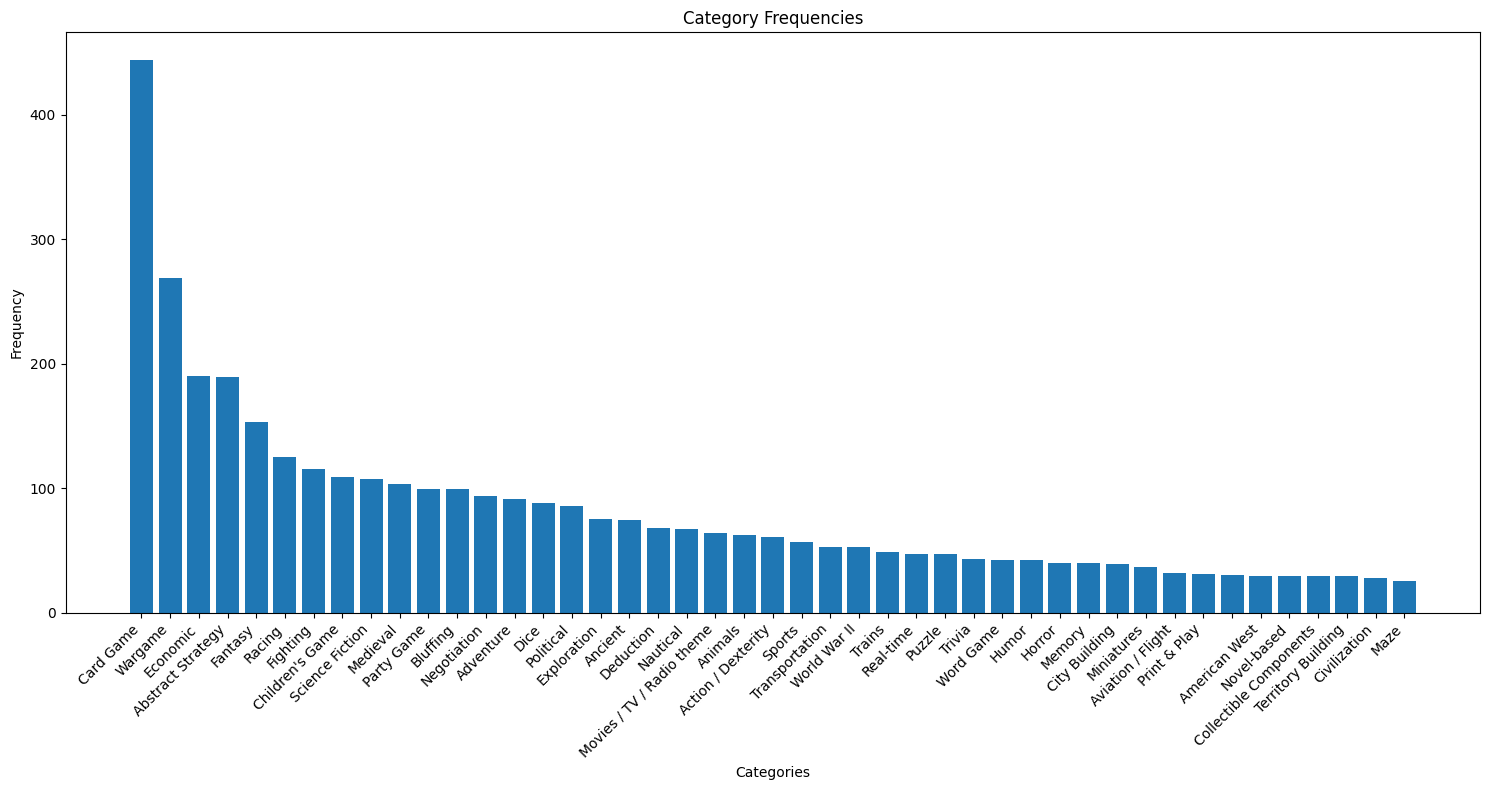


Top 10 most common categories:
shape: (10, 2)
┌───────────────────┬───────┐
│ categories        ┆ count │
│ ---               ┆ ---   │
│ str               ┆ u32   │
╞═══════════════════╪═══════╡
│ Card Game         ┆ 444   │
│ Wargame           ┆ 269   │
│ Economic          ┆ 190   │
│ Abstract Strategy ┆ 189   │
│ Fantasy           ┆ 153   │
│ Racing            ┆ 125   │
│ Fighting          ┆ 115   │
│ Children's Game   ┆ 109   │
│ Science Fiction   ┆ 107   │
│ Medieval          ┆ 103   │
└───────────────────┴───────┘


In [ ]:
import polars as pl
import matplotlib.pyplot as plt

# Calculate frequencies
frequencies = (
    df["categories"]
    .explode()
    .value_counts()
    .sort(by="count", descending=True)  # Changed from "counts" to "count"
)

filtered_frequencies = frequencies.filter(pl.col("count") >= 25)

# Create the plot
plt.figure(figsize=(15, 8))
plt.bar(range(len(filtered_frequencies)), filtered_frequencies['count'])  # Changed from "counts" to "count"
plt.xticks(range(len(filtered_frequencies)), filtered_frequencies['categories'], rotation=45, ha='right')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Category Frequencies')
plt.tight_layout()
plt.show()

# Print top 10 most common categories
print("\nTop 10 most common categories:")
print(frequencies.head(10))

# Card Game
# Party Game
# Wargame
# Economic
# Abstract Strategy
# Fantasy
# Racing 
# Fighting
# Children's Game
# Science Fiction
# Medieval
# Bluffing
# Negotiation
# Adventure
# Dice
# Political
# Exploration
# Ancient
# Deduction
# Nautical
# Movies / TV / Radio Theme
# Animals
# Action / Dexterity
# Sports
# Puzzle
# Trivia
# Word Game
# Humor
# Horror
# Memory


In [36]:
import polars as pl
import matplotlib.pyplot as plt

# Assuming `df` is your Polars DataFrame
# Convert the `categories` column from `list[str]` to `pl.Array`
df = df.with_columns(pl.col("categories").cast(pl.List(pl.Utf8)))

# Filter rows that contain "Card Game" and get co-occurring categories
co_occurrences = (
    df.filter(pl.col("categories").arr.contains("Card Game"))
    .select(pl.col("categories").explode())  # Explode the list of categories
    .filter(pl.col("categories") != "Card Game")  # Remove "Card Game" itself
    .value_counts()  # Count occurrences of each category
    .sort(by="count", descending=True)  # Sort by count in descending order
)

# Check if co_occurrences is not empty
if co_occurrences.height > 0:
    # Create the plot
    plt.figure(figsize=(15, 8))
    plt.bar(range(len(co_occurrences)), co_occurrences["count"].to_list())
    plt.xticks(range(len(co_occurrences)), co_occurrences["categories"].to_list(), rotation=45, ha='right')
    plt.xlabel('Categories')
    plt.ylabel('Co-occurrence Frequency with Card Game')
    plt.title('Categories Most Commonly Associated with Card Game')
    plt.tight_layout()
    plt.show()

    # Print top co-occurring categories
    print("\nTop categories that appear with Card Game:")
    print(co_occurrences)
else:
    print("No co-occurring categories found with 'Card Game'.")

SchemaError: invalid series dtype: expected `Array`, got `list[str]`

In [ ]:
distinct_values = df.select(pl.col("min_players").unique()).to_series().to_list()
    
print("Distinct values in 'recommended_num_players':", distinct_values)

Distinct values in 'recommended_num_players': [1, 2, 3, 4]


In [5]:
import polars as pl

df = pl.read_json("game_data.json")

In [7]:
df.filter(pl.col("game_name") == 'Illuminati')

mechanics,GAME_CAT_environmental,GAME_CAT_deduction,GROUP_SIZE_small,GAME_CAT_zombies,GAME_CAT_miniatures,min_players,AGE_GROUP_kids,GAME_CAT_science fiction,GAME_CAT_memory,subcategory_1,GAME_CAT_american revolutionary war,GAME_CAT_number,popularity_score,GAME_CAT_bluffing,GAME_CAT_ancient,GAME_CAT_medieval,recommended_num_players,AGE_GROUP_family,designers,max_players,rank_subcategory_1,GAME_CAT_collectible components,GAME_CAT_medical,GAME_CAT_arabian,GAME_CAT_maze,GAME_CAT_industry / manufacturing,LANGUAGE_DEPENDENCY_high,GAME_CAT_mature / adult,game_name,avg_weight,description,GAME_CAT_civil war,subcategory_2,GAME_CAT_comic book / strip,GROUP_SIZE_solo,GAME_CAT_american west,…,playing_time,GAME_DURATION_short,GAME_CAT_game system,LANGUAGE_DEPENDENCY_medium,num_weights,playing_time_group,owned_by,GAME_CAT_civilization,LANGUAGE_DEPENDENCY_none,GAME_CAT_fantasy,GAME_CAT_travel,GAME_CAT_transportation,GAME_CAT_humor,GAME_CAT_novel-based,GAME_CAT_farming,GAME_CAT_real-time,GAME_CAT_math,GAME_CAT_age of reason,GAME_CAT_book,GAME_CAT_economic,GAME_CAT_trains,GAME_CAT_word game,GAME_CAT_korean war,GAME_CAT_religious,GAME_CAT_animals,GAME_CAT_vietnam war,GAME_CAT_murder / mystery,min_age,avg_rating,GAME_CAT_fighting,LANGUAGE_DEPENDENCY_extreme,publication_year,GAME_CAT_mafia,wished_by,AGE_GROUP_teen,GAME_CAT_adventure,GAME_CAT_pike and shot
list[str],i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,f64,i64,i64,i64,str,i64,list[str],i64,i64,i64,i64,i64,i64,i64,i64,i64,str,f64,str,i64,str,i64,i64,i64,…,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64
"[""Dice Rolling"", ""Network and Route Building"", … ""Variable Player Powers""]",0,0,0,0,0,2,0,1,0,"""thematic""",0,0,0.162425,0,0,0,"""3""",1,"[""Steve Jackson (I)""]",6,648,0,0,0,0,0,1,0,"""Illuminati""",2.6568,"""In this classic Steve Jackson …",0,"""strategygames""",0,0,0,…,180,0,0,0,437,"""Very_Long""",9703,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,6.46742,0,0,1987,0,461,0,0,0
"[""Hand Management""]",0,0,0,0,0,2,0,1,0,"""thematic""",0,0,0.138118,0,0,0,"""3""",1,"[""Steve Jackson (I)""]",6,924,0,0,0,0,0,1,0,"""Illuminati""",2.4842,"""Illuminati is a classic Steve …",0,"""strategygames""",0,0,0,…,120,0,0,0,221,"""Long""",4073,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,6.17671,0,0,1982,0,191,0,0,0


In [24]:
game_names = df.sample(n=10, shuffle=True).select("game_name").to_series().to_list()

In [25]:
game_names

['Dragon Masters',
 'Twitch',
 'Chess',
 'MedFront: War in North Africa 1940-43',
 'Modern Art',
 'Black Death',
 'Ikusa',
 'Runes',
 'Manhattan',
 'Union vs. Central']

In [48]:

# Convert the `categories` column to Polars List type
df = df.with_columns(pl.col("categories").cast(pl.List(pl.Utf8)))

# Verify the schema
print(df.schema)

Schema([('game_name', String), ('description', String), ('subcategory_1', String), ('subcategory_2', String), ('publication_year', Int32), ('min_players', Int32), ('max_players', Int32), ('best_num_players', String), ('recommended_num_players', String), ('suggested_play_age', Int32), ('categories', List(String)), ('mechanics', List(String)), ('families', List(String)), ('designers', List(String)), ('artists', List(String)), ('publishers', List(String)), ('playing_time', Int32), ('min_playtime', Int32), ('max_playtime', Int32), ('min_age', Int32), ('language_dependence_description', String), ('game_rank', Int32), ('avg_rating', Float64), ('num_rates', Int32), ('rank_subcategory_1', Int32), ('rank_subcategory_2', Int32), ('avg_weight', Float64), ('num_weights', Int32), ('owned_by', Int32), ('wished_by', Int32)])


In [49]:
# Filter rows that contain "Card Game" and get co-occurring categories
co_occurrences = (
    df.filter(pl.col("categories").arr.contains("Card Game"))
    .select(pl.col("categories").explode())  # Explode the list of categories
    .filter(pl.col("categories") != "Card Game")  # Remove "Card Game" itself
    .value_counts()  # Count occurrences of each category
    .sort(by="count", descending=True)  # Sort by count in descending order
)

# Check if co_occurrences is not empty
if co_occurrences.height > 0:
    # Create the plot
    plt.figure(figsize=(15, 8))
    plt.bar(range(len(co_occurrences)), co_occurrences["count"].to_list())
    plt.xticks(range(len(co_occurrences)), co_occurrences["categories"].to_list(), rotation=45, ha='right')
    plt.xlabel('Categories')
    plt.ylabel('Co-occurrence Frequency with Card Game')
    plt.title('Categories Most Commonly Associated with Card Game')
    plt.tight_layout()
    plt.show()

    # Print top co-occurring categories
    print("\nTop categories that appear with Card Game:")
    print(co_occurrences)
else:
    print("No co-occurring categories found with 'Card Game'.")

SchemaError: invalid series dtype: expected `Array`, got `list[str]`